# Aktivierungen für verschieden Ereignisse

### module importieren

In [29]:
import numpy as np
from nilearn import image, input_data, plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame

### Dateiname des funktionellen Bildes

In [2]:
epi_file = '../data/sub-01_task-imagery_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz'

In [3]:
epi_file

'../data/sub-01_task-imagery_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz'

### Maske definieren

In [30]:
masker = input_data.NiftiMasker(mask_img='../external/MNI152_T1_2mm_brain_mask.nii.gz',
                                standardize=True,
                                smoothing_fwhm=8).fit()

In [46]:
mean_img = image.mean_img(epi_file)

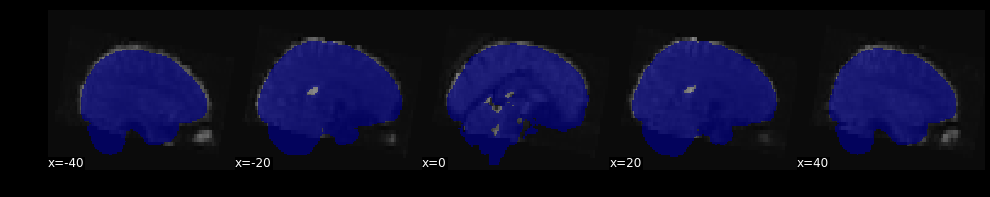

In [48]:
plotting.plot_roi(masker.mask_img_,bg_img=mean_img,display_mode='x',cut_coords=range(-40,41,20))
plt.show()

### Exkursion: Effekte räumlicher Glättung

Durchschnittsbild der Zeitserie als Beispiel:

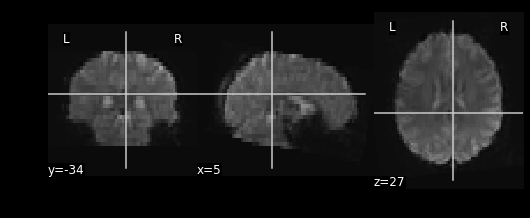

In [49]:
plotting.plot_anat(mean_img)
plt.show()

Bild nach räumlicher Glättung

In [8]:
smooth_mean_img = image.smooth_img(mean_img,10)

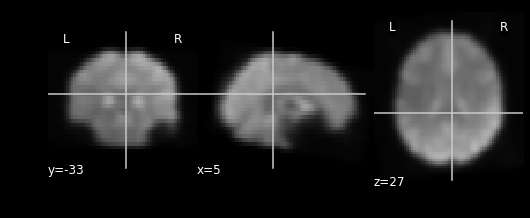

In [9]:
plotting.plot_anat(smooth_mean_img)
plt.show()

Bild mit Rauschen überlagern

In [10]:
img_dims = image.load_img(mean_img).get_data().shape
random_img = image.new_img_like(mean_img, np.random.rand(*img_dims)*1000)
mean_with_noise_img = image.math_img('img1+img2',img1=mean_img,img2=random_img)

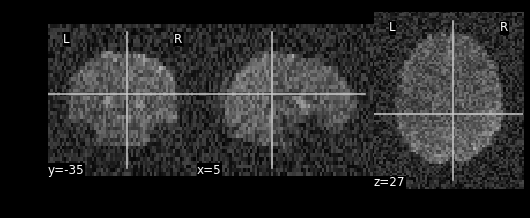

In [11]:
plotting.plot_anat(mean_with_noise_img)
plt.show()

Verschieden starkes Smoothing für Originalbild vs. Verrauschtes Bild ausprobieren

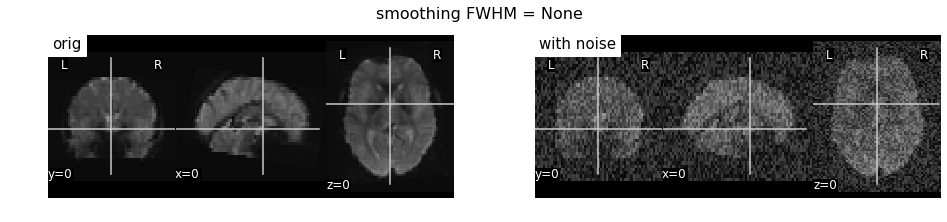

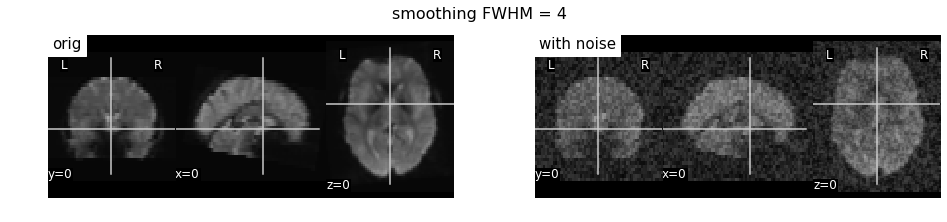

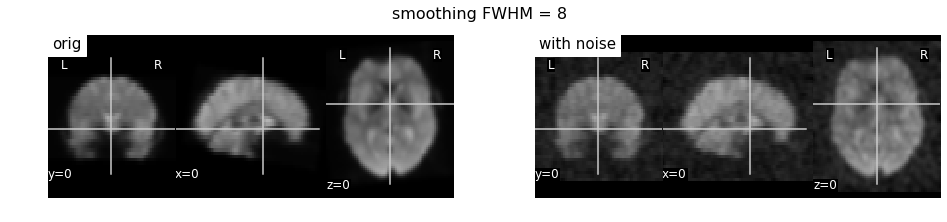

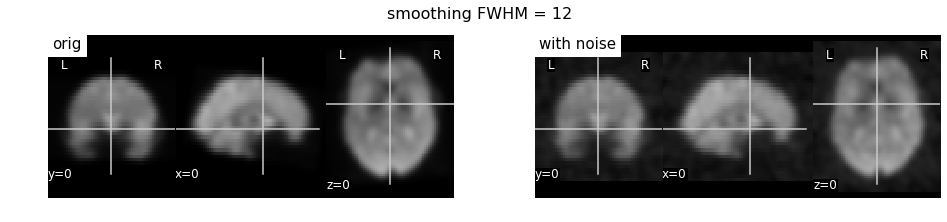

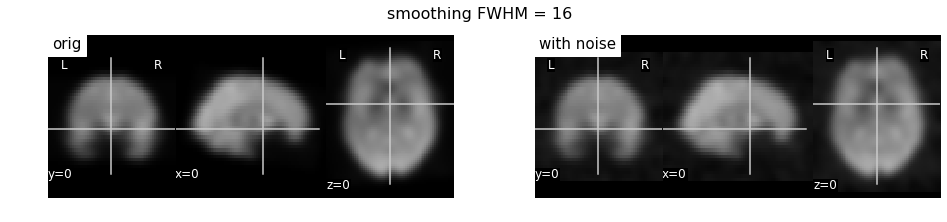

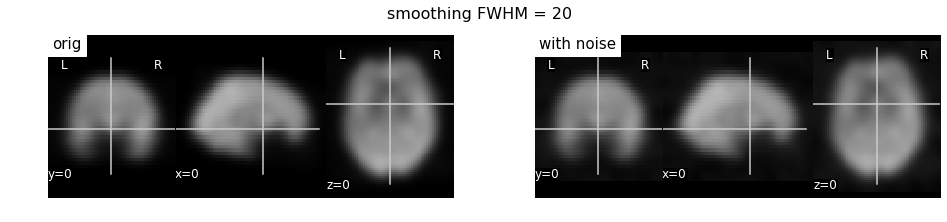

In [50]:
for my_smoothing in [None,4,8,12,16,20]:
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,3))
    
    smooth_mean_img = image.smooth_img(mean_img,my_smoothing)
    smooth_mean_with_noise_img = image.smooth_img(mean_with_noise_img,my_smoothing)
    
    plotting.plot_anat(smooth_mean_img,cut_coords=(0,0,0),title='orig',axes=ax1)
    plotting.plot_anat(smooth_mean_with_noise_img,cut_coords=(0,0,0),title='with noise',axes=ax2)
    
    plt.suptitle('smoothing FWHM = %s'%my_smoothing,y=1.01,fontsize=16)
    
    plt.show()

### Voxelwerte auslesen

In [ ]:
epi_data = masker.transform(epi_file)

In [14]:
epi_data.shape

(203, 228483)

In [15]:
epi_data

array([[-1.36096075, -1.19697401, -1.00684762, ..., -0.32190256,
        -0.30905731, -0.31608869],
       [-0.91234837, -0.6012437 , -0.19100744, ...,  0.21487692,
         0.57219679,  0.67522661],
       [-0.67636535, -0.55721431, -0.44944504, ...,  1.41888524,
         1.33718441,  1.25202417],
       ...,
       [ 1.18023881,  1.02383819,  0.78904127, ..., -0.24144463,
        -0.39638263, -0.30946381],
       [ 0.84475017,  0.64846027,  0.45983686, ..., -0.15146362,
        -0.35042781, -0.25739627],
       [ 1.19855991,  0.89543509,  0.52274271, ...,  0.57408892,
         0.18375039,  0.26662132]])

### In Tabelle umwandeln

In [16]:
epi_df = pd.DataFrame(epi_data)

In [17]:
epi_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,228473,228474,228475,228476,228477,228478,228479,228480,228481,228482
198,1.382881,0.988377,0.622357,1.588949,1.145390,2.058703,1.637509,1.206544,1.524183,0.373292,...,-0.745036,-1.068331,1.223884,0.690487,0.104411,-0.377628,0.877094,0.201367,-0.307948,-0.129213
199,0.319281,0.015208,-0.368842,0.445116,0.074239,0.967761,0.602128,0.184722,0.729344,-1.367070,...,0.102807,-0.616292,-0.194974,-0.601147,-0.790260,-0.727877,-0.569801,-0.872991,-0.884107,-0.952479
200,1.180239,1.023838,0.789041,1.248082,1.098227,1.436483,1.344111,1.219919,1.407007,0.101427,...,0.348382,-0.149989,0.213004,0.046755,-0.113123,-0.321587,0.058131,-0.241445,-0.396383,-0.309464
201,0.844750,0.648460,0.459837,1.120717,0.925154,1.579997,1.383112,1.201520,1.539666,-0.440359,...,0.324250,0.420882,0.147412,0.042060,-0.071371,-0.170758,0.144248,-0.151464,-0.350428,-0.257396
202,1.198560,0.895435,0.522743,1.419399,1.198853,1.628112,1.585622,1.465535,1.696706,-0.443028,...,0.826416,0.552048,1.519291,1.150949,0.583072,0.066379,0.997120,0.574089,0.183750,0.266621


### Studiendesign

Meta-Informationen:

* t_r-parameter sagt, wie lange ein Volumen erhoben wurde (in Sekunden)
* shift-parameter sagt, wie die HRF modelliert wird (um eine tr verschoben)

In [18]:
t_r = 3
shift = 1

Datei mit Onsets

In [19]:
design_df = pd.read_csv('../data/sub-01_task-imagery_run-01_events.tsv',
                        sep='\t',
                        index_col=[2,4])

design_df = design_df.sort_index()

design_df

onset  duration trial_subdomain
trial_domain trial_content                                    
EMOTION      Klippe              360        30         Negativ
             Strand              450        30         Positiv
             Sturm                90        30         Negativ
             Wald                180        30         Positiv
GESICHTER    Familie             300        30         Bekannt
             Filmschauspieler    210        30        Beruehmt
             Freunde              60        30         Bekannt
             Musiker             480        30        Beruehmt
MOTORIK      Balltreten          150        30          Fuesse
             Fahrrad             510        30          Fuesse
             Jonglieren           30        30          Haende
             Kanu                330        30          Haende
RUHE         Ruhe                120        30            Ruhe
             Ruhe                270        30            Ruhe
             Ruhe                420        30            Ruhe
             Ruhe                570        30            Ruhe
SPRACHE      Lebensmittel        240        30       Schreiben
             Staedte             390        30        Sprechen
             Tiere                 0        30        Sprechen
             Vornamen            540        30       Schreiben

### Onsets für eine Bedingung

In [20]:
my_condition = 'MOTORIK'

In [21]:
onsets_start = design_df.loc[my_condition,'onset']/t_r
onsets_start

trial_content
Balltreten     50.0
Fahrrad       170.0
Jonglieren     10.0
Kanu          110.0
Name: onset, dtype: float64

### start jedes Blocks in Volumen-weise Informationen umwandeln

In [22]:
def get_all_onsets(onsets_start):
    all_volumes = []
    for start in onsets_start:
        int_start = int(start)
        these_onsets = range(int_start+shift,int_start+10+shift)
        all_volumes = all_volumes + list(these_onsets)
    return all_volumes

In [23]:
my_volumes = get_all_onsets(onsets_start)
print(my_volumes)

[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]


### gemittelte Aktivität als Hirnbild

In [55]:
mean_cond_df = epi_df.loc[my_volumes,:].mean(axis=0)
mean_cond_img = masker.inverse_transform(mean_cond_df)

### Visualisierung

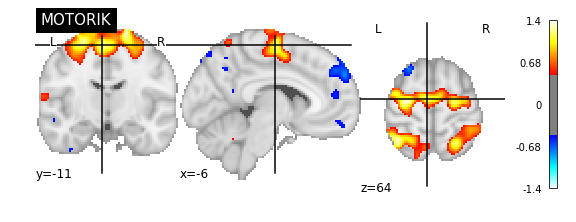

In [54]:
plotting.plot_stat_map(mean_cond_img,
                       threshold=0.5,
                       title=my_condition)
plt.show()

### Als Funktion die eine Beidingung als Input nimmt und eine Karte als Output generiert

In [26]:
def make_mean_img(my_condition,my_threshold=0.5):
    
    onsets_start = design_df.loc[my_condition,'onset']/t_r
    my_volumes = get_all_onsets(onsets_start)
    mean_cond_df = epi_df.loc[my_volumes,:].mean(axis=0)
    mean_cond_img = masker.inverse_transform(mean_cond_df)
    
    fig,ax = plt.subplots(1,1,figsize=(16,2))
    plotting.plot_stat_map(mean_cond_img,
                           threshold=my_threshold,
                           display_mode='x',
                           cut_coords=range(-50,50,10),
                           title=my_condition,axes=ax)
    return

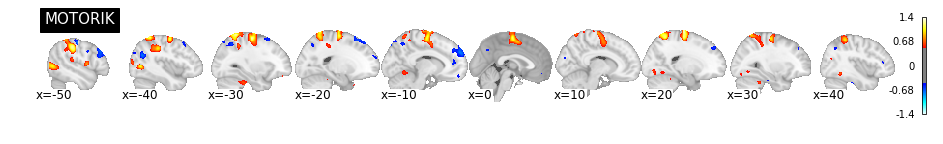

In [27]:
make_mean_img('MOTORIK')

### Schleife für alle Bedingungen

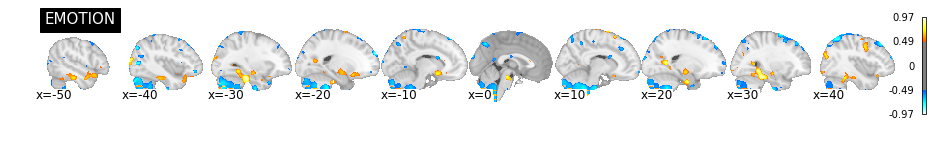

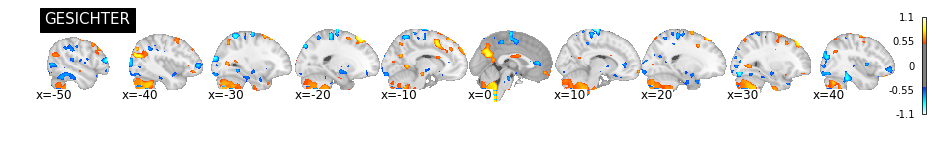

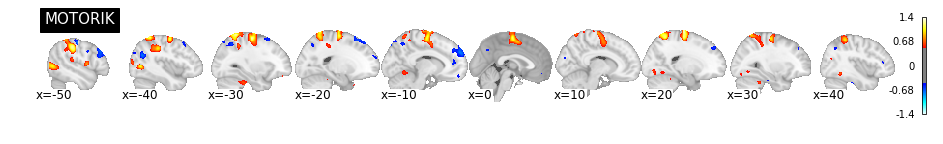

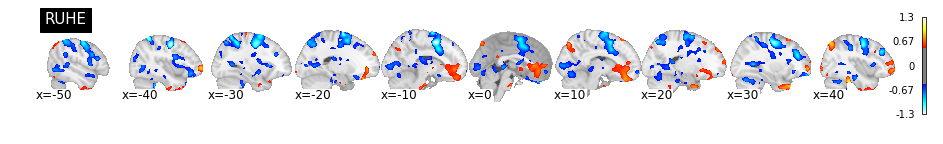

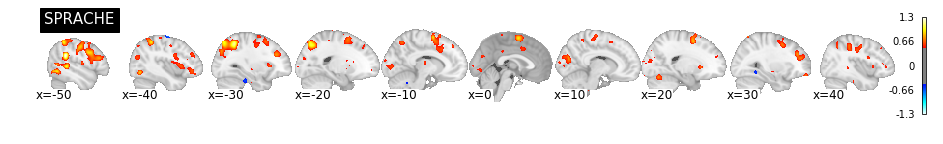

In [28]:
for cond in design_df.index.levels[0]:
    display = make_mean_img(cond)
    plt.show()